## 1. <a>Import Libraries</a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest


from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")

## 2. <a>Read Data</a>


In [2]:
df_transformed = pd.read_csv('../Data/Data_MinMaxSca.csv')
df_transformed

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.002148           0.818182   0.001945          0.000000   
1     0.168169           0.909091   0.000000          0.000000   
2     0.131026           1.000000   0.015766          0.018968   
3     0.087521           0.636364   0.030567          0.036775   
4     0.042940           1.000000   0.000326          0.000393   
...        ...                ...        ...               ...   
8945  0.001496           1.000000   0.005936          0.000000   
8946  0.001007           1.000000   0.006118          0.000000   
8947  0.001229           0.833333   0.002945          0.000000   
8948  0.000707           0.833333   0.000000          0.000000   
8949  0.019572           0.666667   0.022293          0.026821   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.004240      0.000000             0.166667   
1                   0.000000      0.136685             0.000000   
2                   0.000000      0.000000             1.000000   
3                   0.000000      0.004366             0.083333   
4                   0.000000      0.000000             0.083333   
...                      ...           ...                  ...   
8945                0.012939      0.000000             1.000000   
8946                0.013333      0.000000             1.000000   
8947                0.006418      0.000000             0.833333   
8948                0.000000      0.000776             0.000000   
8949                0.000000      0.002695             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000           0.00000       0.005587      0.031720   
1                   0.166667           0.03252       0.000000      0.232053   
2                   0.000000           0.00000       0.033520      0.248748   
3                   0.055555           0.00813       0.002793      0.248748   
4                   0.000000           0.00000       0.002793      0.038397   
...                      ...               ...            ...           ...   
8945                0.000000           0.00000       0.016760      0.031720   
8946                0.000000           0.00000       0.016760      0.031720   
8947                0.000000           0.00000       0.013966      0.031720   
8948                0.111111           0.01626       0.000000      0.015025   
8949                0.222222           0.01626       0.064246      0.038397   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.003979          0.001826          0.000000     1.0  
1     0.080893          0.014034          0.222222     1.0  
2     0.012264          0.008210          0.000000     1.0  
3     0.000000          0.004088          0.000000     1.0  
4     0.013374          0.003204          0.000000     1.0  
...        ...               ...               ...     ...  
8945  0.006419          0.000640          0.500000     0.0  
8946  0.005439          0.004088          0.000000     0.0  
8947  0.001602          0.001078          0.250000     0.0  
8948  0.0

In [3]:
df_transformed.describe().T

count      mean       std  min       25%  \
BALANCE                           8950.0  0.082154  0.109306  0.0  0.006736   
BALANCE_FREQUENCY                 8950.0  0.877271  0.236904  0.0  0.888889   
PURCHASES                         8950.0  0.020457  0.043570  0.0  0.000808   
ONEOFF_PURCHASES                  8950.0  0.014534  0.040722  0.0  0.000000   
INSTALLMENTS_PURCHASES            8950.0  0.018270  0.040193  0.0  0.000000   
CASH_ADVANCE                      8950.0  0.020766  0.044491  0.0  0.000000   
PURCHASES_FREQUENCY               8950.0  0.490351  0.401371  0.0  0.083333   
ONEOFF_PURCHASES_FREQUENCY        8950.0  0.202458  0.298336  0.0  0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0  0.364437  0.397448  0.0  0.000000   
CASH_ADVANCE_FREQUENCY            8950.0  0.090096  0.133414  0.0  0.000000   
CASH_ADVANCE_TRX                  8950.0  0.026413  0.055485  0.0  0.000000   
PURCHASES_TRX                     8950.0  0.041089  0.069435  0.0  0.002793   
CREDIT_LIMIT                      8950.0  0.148390  0.121491  0.0  0.051753   
PAYMENTS                          8950.0  0.034170  0.057078  0.0  0.007556   
MINIMUM_PAYMENTS                  8950.0  0.011058  0.030531  0.0  0.002236   
PRC_FULL_PAYMENT                  8950.0  0.153715  0.292499  0.0  0.000000   
TENURE                            8950.0  0.919553  0.223055  0.0  1.000000   

                                       50%       75%  max  
BALANCE                           0.045864  0.107868  1.0  
BALANCE_FREQUENCY                 1.000000  1.000000  1.0  
PURCHASES                         0.007367  0.022637  1.0  
ONEOFF_PURCHASES                  0.000932  0.014166  1.0  
INSTALLMENTS_PURCHASES            0.003956  0.020828  1.0  
CASH_ADVANCE                      0.000000  0.023629  1.0  
PURCHASES_FREQUENCY               0.500000  0.916667  1.0  
ONEOFF_PURCHASES_FREQUENCY        0.083333  0.300000  1.0  
PURCHASES_INSTALLMENTS_FREQUENCY  0.166667  0.750000  1.0  
CASH_ADVANCE_FREQUENCY            0.000000  0.148148  1.0  
CASH_ADVANCE_TRX                  0.000000  0.032520  1.0  
PURCHASES_TRX                     0.019553  0.047486  1.0  
CREDIT_LIMIT                      0.098497  0.215359  1.0  
PAYMENTS                          0.016894  0.037482  1.0  
MINIMUM_PAYMENTS                  0.004088  0.010322  1.0  
PRC_FULL_PAYMENT                  0.000000  0.142857  1.0  
TENURE                            1.000000  1.000000  1.0

## 3. <a>TSNE Visualize Data</a>


In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, 
            perplexity=80,  
            random_state=42,
            n_iter=300).fit_transform(df_transformed)

In [6]:
df_embed = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed



feature1  feature2
0    -3.092095 -0.845065
1    -4.791693 -5.782605
2     8.012232 -6.043531
3    -6.056050  1.684146
4    -2.639165 -3.167396
...        ...       ...
8945 -1.466049  6.516825
8946  0.000710  4.908300
8947 -0.461162  5.123566
8948 -6.852159 -0.210678
8949 -3.779063  0.175931

[8950 rows x 2 columns]

[Text(0.5, 1.0, 'All Data')]

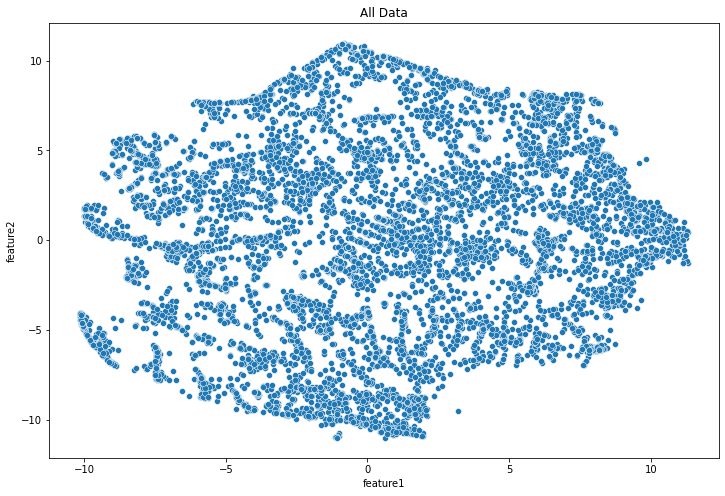

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed,    
    palette=sns.color_palette("hls", 2)
).set(title='All Data')

# Clustreing


## 1. <a>K-Means</a>


#### First, Select number of clusters (k) using Elbow Method 

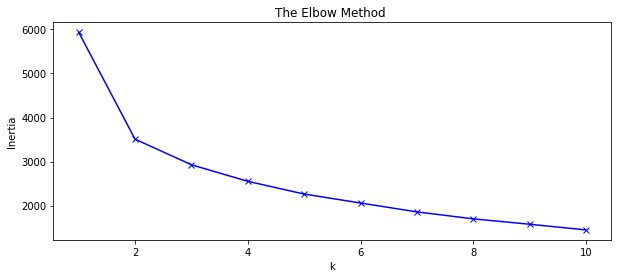

In [8]:
# To plot Elbow With Inertia 
inertia = []
Range = [*range(1,11)]

for k in Range: 
    kmean = KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmean.fit(df_transformed)
    inertia.append(kmean.inertia_)
    
plt.figure(figsize=(10,4))
plt.plot(Range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method ')
plt.show()

In [9]:
# To calc. the best number of k from elbow method curve
drop_variation = []
drop_variation.append(0) #add 0 in the first element 

for i in range(len(inertia) -1):
    dropValue = inertia[i] - inertia[i+1]
    drop_variation.append(dropValue) 

# select suitable k that have large drop in the variation
k = Range[np.argmax(drop_variation)]
print("Suitable number of clusters = ",k)

Suitable number of clusters =  2


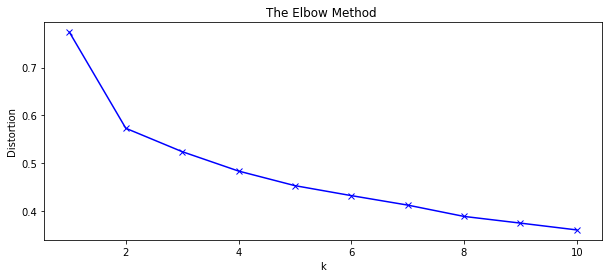

In [10]:
# To plot Elbow With Distortion 
from scipy.spatial.distance import cdist
distortions = []
Range = [*range(1,11)]

for n in Range:
    kmean = KMeans(n_clusters=n, max_iter=300, random_state=42)
    kmean.fit(df_transformed)
    distortions.append(np.average(np.min(cdist(df_transformed, kmean.cluster_centers_, 'euclidean'), axis=1)))
    
plt.figure(figsize=(10,4))
plt.plot(Range, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method ')
plt.show()

###  KMean in Sklearn

In [155]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(df_transformed)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
#print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 4724
sum of elements that contain in cluster 1 : 2783
sum of elements that contain in cluster 2 : 1443
--------------------------------------------------


In [156]:
# Calc. silhouette score for kmean sklearn
from sklearn.metrics import silhouette_score

score = silhouette_score(df_transformed,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.372


In [157]:
# Calc. silhoutte score for different k
for i in [*range(2,7)]:
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df_transformed)
    label = kmeans.labels_
    print("For n_clusters =",i,"The average silhouette_score is :",silhouette_score(df_transformed,  label, metric='euclidean'))

For n_clusters = 2 The average silhouette_score is : 0.3867209162773277
For n_clusters = 3 The average silhouette_score is : 0.3723938740940775
For n_clusters = 4 The average silhouette_score is : 0.3215102197195544
For n_clusters = 5 The average silhouette_score is : 0.31912461339693887
For n_clusters = 6 The average silhouette_score is : 0.32283104878413765


We notice that silhoutte Score will be better for 2 Clusters (k = 2)

In [158]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_transformed, labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.321


The main motive is to decrease the DB index. 

In [159]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_transformed, labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 4596.063


##### TSNE

In [160]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1  feature2  Clusters
0    -3.092095 -0.845065         0
1    -4.791693 -5.782605         0
2     8.012232 -6.043531         2
3    -6.056050  1.684146         0
4    -2.639165 -3.167396         0
...        ...       ...       ...
8945 -1.466049  6.516825         1
8946  0.000710  4.908300         1
8947 -0.461162  5.123566         1
8948 -6.852159 -0.210678         0
8949 -3.779063  0.175931         2

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

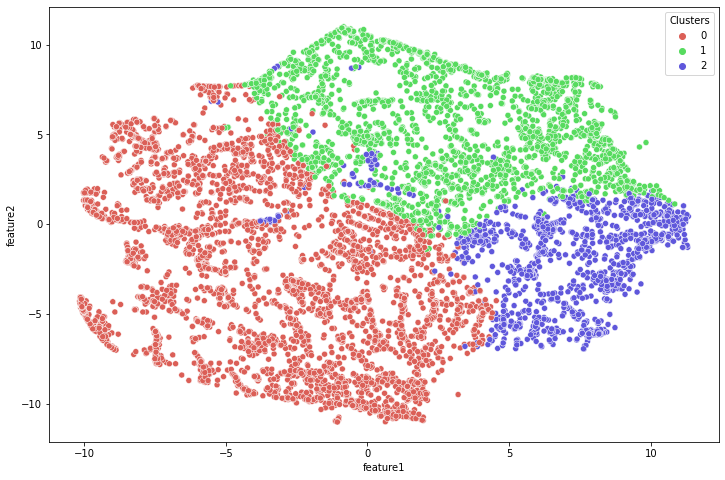

In [162]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 3)
)

## 2. <a>DBSCAN</a>


#### Calculate Knn-Matrix 

In [18]:
from sklearn.neighbors import NearestNeighbors
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
min_s = 10
knn = NearestNeighbors(n_neighbors=min_s+1)
knn.fit(df_transformed)
distances, neighbors = knn.kneighbors(df_transformed)

# distances ---> distance of each point to k nearest neighbours for it
# neighbors ---> index of k nearest neighbors to each poi nt

In [19]:
neighbors  # nearest neighbours for each point in data

array([[   0, 1099, 6322, ..., 2835, 6862, 7708],
       [   1, 4934, 6129, ..., 7668, 3804, 3298],
       [   2, 2250, 3658, ..., 1321, 4577,  221],
       ...,
       [8947, 7722, 5556, ..., 8820, 5849, 5571],
       [8948, 4702, 7906, ..., 7772, 8281, 8663],
       [8949, 4698, 4910, ..., 2544, 5676, 8758]], dtype=int64)

In [20]:
# sort the distances, take last column only and sort them 
distances = np.sort(distances[:, -1], axis = 0) 

##### Elbow Method

Text(0.5, 1.0, 'Elbow Method for Choosing eps')

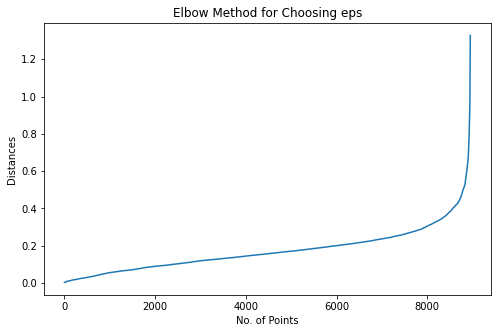

In [21]:
# plot elbow curve to choose first suitable epsilon from it
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("No. of Points")
plt.ylabel("Distances")
plt.title("Elbow Method for Choosing eps")

#### From Elbow curve we can choose epsilon that give us less noise and good clustering

In [36]:
clustering_DB_1 = DBSCAN(eps=0.4, min_samples=12).fit(df_transformed)
label_DBScan_1 = clustering_DB_1.labels_

In [37]:
pd.DataFrame(label_DBScan_1).value_counts()

 0    8789
-1     161
dtype: int64

##### TSNE

In [40]:
df_embed_dbscan = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_dbscan['Clusters']= pd.DataFrame(label_DBScan_1)
df_embed_dbscan

feature1  feature2  Clusters
0    -3.092095 -0.845065         0
1    -4.791693 -5.782605         0
2     8.012232 -6.043531         0
3    -6.056050  1.684146         0
4    -2.639165 -3.167396         0
...        ...       ...       ...
8945 -1.466049  6.516825         0
8946  0.000710  4.908300         0
8947 -0.461162  5.123566         0
8948 -6.852159 -0.210678         0
8949 -3.779063  0.175931         0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

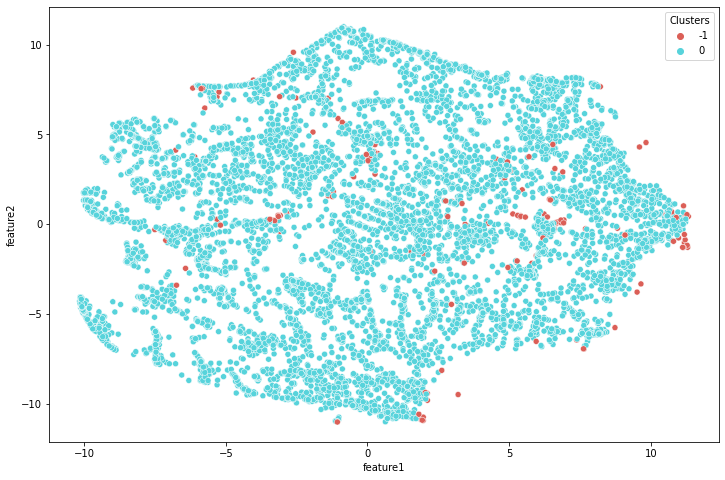

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_dbscan,    
    hue=df_embed_dbscan['Clusters'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>hierarchical</a>


##### Dendrogram

Text(20, 33, 'Cut off')

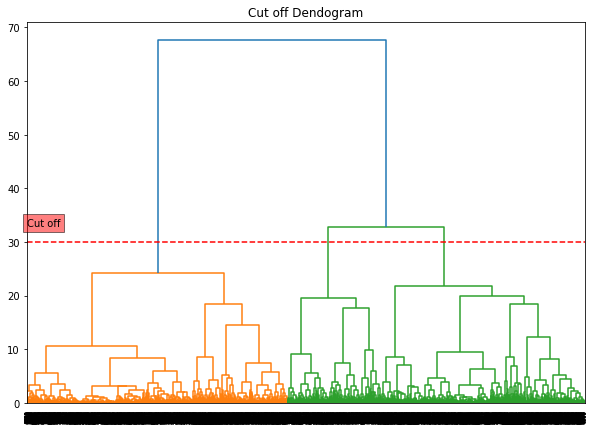

In [50]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Cut off Dendogram")
dend = shc.dendrogram(shc.linkage(y=df_transformed , method='ward',metric='euclidean'))
plt.axhline(y=30, color='r', linestyle='--')
plt.text(20, 33, "Cut off", bbox=dict(facecolor='red', alpha=0.5))

* From Dendrogram will take 3 clusters

In [149]:
from sklearn.cluster import AgglomerativeClustering

clustering_Agg = AgglomerativeClustering(n_clusters=3).fit(df_transformed)
hier_labels = clustering_Agg.labels_
hier_labels


array([0, 0, 2, ..., 1, 0, 1], dtype=int64)

#### Silhouette score for Hiererichal 

In [150]:
# Calc. silhouette score for hiereichal cluster
from sklearn.metrics import silhouette_score

score = silhouette_score(df_transformed,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.333


In [151]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_transformed, hier_labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.488


The main motive is to decrease the DB index. 

In [152]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_transformed, hier_labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 4055.847


##### TSNE

In [153]:
df_embed_hier = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_hier['Clusters']= pd.DataFrame(hier_labels)
df_embed_hier

feature1  feature2  Clusters
0    -3.092095 -0.845065         0
1    -4.791693 -5.782605         0
2     8.012232 -6.043531         2
3    -6.056050  1.684146         0
4    -2.639165 -3.167396         0
...        ...       ...       ...
8945 -1.466049  6.516825         1
8946  0.000710  4.908300         1
8947 -0.461162  5.123566         1
8948 -6.852159 -0.210678         0
8949 -3.779063  0.175931         1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

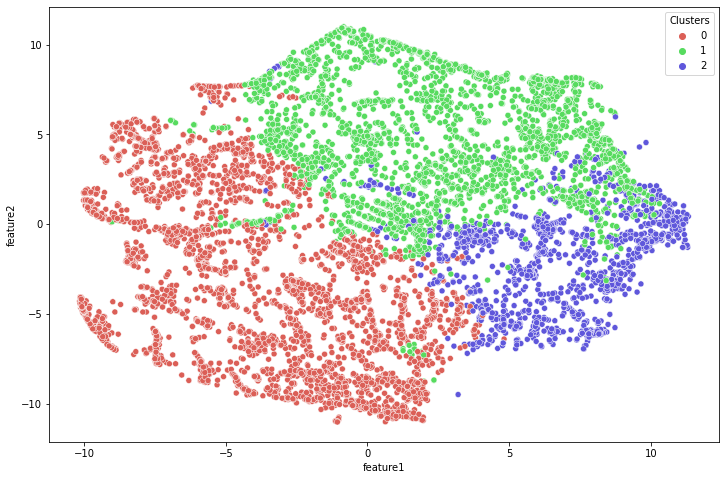

In [154]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_hier,    
    hue=df_embed_hier['Clusters'],
    palette=sns.color_palette("hls", 3)
)


# Anomaly Detection

## 1. <a>Isolated Random Forest</a>


In [69]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_transformed)

anom_pred = clf.predict(df_transformed)
anom_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [70]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [71]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1  feature2  Labels
0    -3.092095 -0.845065       1
1    -4.791693 -5.782605       1
2     8.012232 -6.043531       1
3    -6.056050  1.684146       1
4    -2.639165 -3.167396       1
...        ...       ...     ...
8945 -1.466049  6.516825       1
8946  0.000710  4.908300       1
8947 -0.461162  5.123566       1
8948 -6.852159 -0.210678       1
8949 -3.779063  0.175931      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

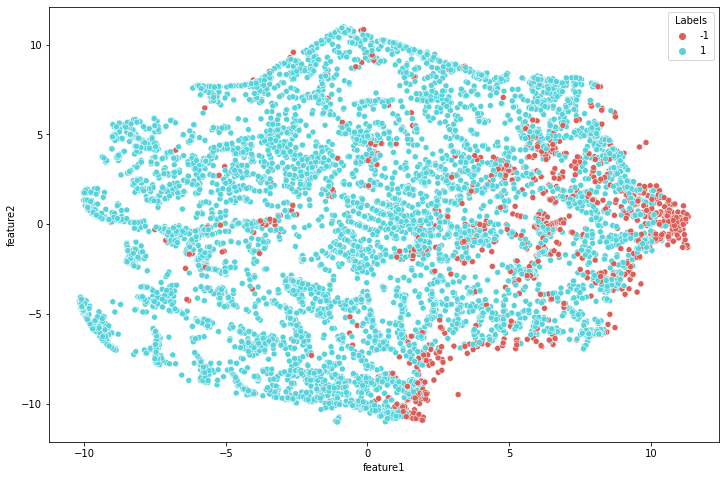

In [72]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM</a>


In [73]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_transformed)

In [74]:
scores = gm.score_samples(df_transformed)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [75]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1  feature2  Labels
0    -3.092095 -0.845065       1
1    -4.791693 -5.782605       1
2     8.012232 -6.043531       1
3    -6.056050  1.684146       1
4    -2.639165 -3.167396       1
...        ...       ...     ...
8945 -1.466049  6.516825       1
8946  0.000710  4.908300       1
8947 -0.461162  5.123566       1
8948 -6.852159 -0.210678       1
8949 -3.779063  0.175931      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

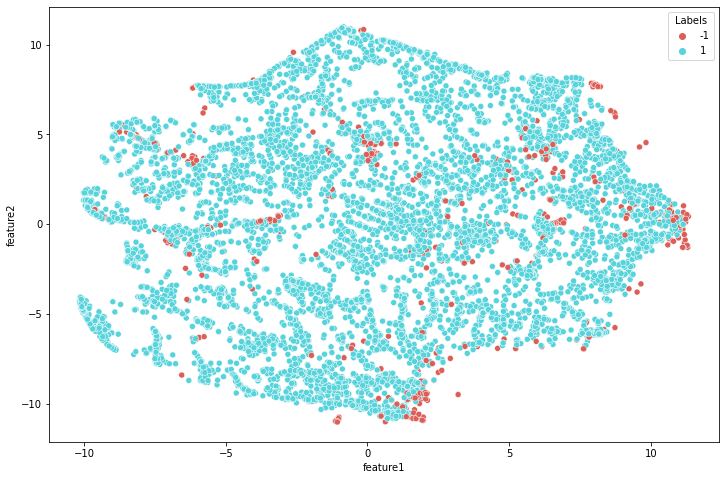

In [76]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN</a>


In [81]:
DB = DBSCAN(eps=0.5, min_samples=17).fit(df_transformed)
label_DBScan = DB.labels_

In [82]:
pd.DataFrame(label_DBScan).value_counts()

 0    8875
-1      75
dtype: int64

##### TSNE

In [83]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(label_DBScan)
df_embed_Iso

feature1  feature2  Labels
0    -3.092095 -0.845065       0
1    -4.791693 -5.782605       0
2     8.012232 -6.043531       0
3    -6.056050  1.684146       0
4    -2.639165 -3.167396       0
...        ...       ...     ...
8945 -1.466049  6.516825       0
8946  0.000710  4.908300       0
8947 -0.461162  5.123566       0
8948 -6.852159 -0.210678       0
8949 -3.779063  0.175931       0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

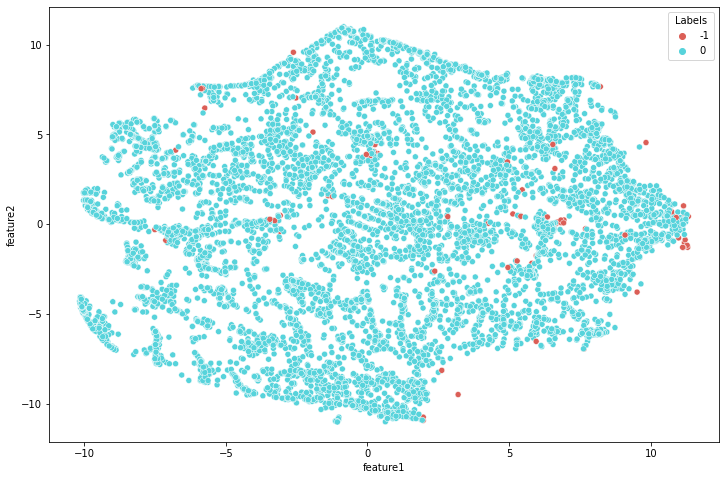

In [84]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


# Dimensionality Reduction


## 1.<a> PCA </a>
#### Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df_pca=pd.DataFrame(pca.fit_transform(df_transformed))
df_pca.shape

(8950, 7)

In [86]:
df_pca

0         1         2         3         4         5         6
0    -0.482168 -0.097653 -0.046473 -0.058293  0.109979 -0.171672  0.018602
1    -0.608575 -0.019376  0.082109 -0.218748 -0.099024  0.137029  0.047467
2     0.304508  0.920934  0.012204  0.160033  0.162325 -0.158527 -0.006547
3    -0.588622 -0.005631  0.037055  0.004430  0.223708  0.065366  0.096132
4    -0.554357  0.052978 -0.084182 -0.132827 -0.017081 -0.204461  0.056412
...        ...       ...       ...       ...       ...       ...       ...
8945  0.646916 -0.463095  0.210333  0.613566 -0.663510 -0.149584  0.086299
8946  0.549889 -0.406725 -0.214439  0.779995 -0.505241 -0.193648  0.101667
8947  0.360383 -0.422686  0.105869  0.744952 -0.480295 -0.135270  0.090536
8948 -0.646100 -0.204392  0.281758  0.633023 -0.571143 -0.104927  0.095782
8949 -0.094602  0.399514  0.195991  1.011317 -0.264965 -0.078128 -0.112224

[8950 rows x 7 columns]

## 2. <a> Kernal-PCA </a>
#### Non-linear dimensionality reduction through the use of kernels 

In [88]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=7, kernel='rbf')
df_kpca = pd.DataFrame(kpca.fit_transform(df_transformed))
df_kpca

0         1         2         3         4         5         6
0    -0.161372 -0.033983 -0.015271 -0.015273 -0.039978 -0.056103  0.011135
1    -0.202085 -0.007514  0.024268 -0.074005  0.024310  0.046554  0.013142
2     0.099371  0.303452 -0.004727  0.055154 -0.047812 -0.055494 -0.031444
3    -0.195312 -0.003915  0.013424  0.010730 -0.073738  0.021499  0.028419
4    -0.184946  0.014329 -0.030985 -0.045092  0.000368 -0.064461  0.026940
...        ...       ...       ...       ...       ...       ...       ...
8945  0.208797 -0.139652  0.080770  0.168775  0.235025 -0.055099  0.017253
8946  0.179528 -0.127224 -0.052926  0.232428  0.190618 -0.066173  0.021667
8947  0.120090 -0.129780  0.046802  0.223081  0.185138 -0.054671  0.017995
8948 -0.200249 -0.057778  0.098942  0.189093  0.208866 -0.032207  0.045575
8949 -0.026380  0.132746  0.066640  0.311261  0.125372 -0.036680 -0.043941

[8950 rows x 7 columns]

# Clustering + PCA

## KMean + PCA

In [89]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_pca)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 3648
sum of elements that contain in cluster 1 : 1389
sum of elements that contain in cluster 2 : 2701
sum of elements that contain in cluster 3 : 1212
--------------------------------------------------


In [90]:
score = silhouette_score(df_pca,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.336


Using PCA made Silhoutte score increase

In [91]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1  feature2  Clusters
0    -3.092095 -0.845065         0
1    -4.791693 -5.782605         0
2     8.012232 -6.043531         1
3    -6.056050  1.684146         0
4    -2.639165 -3.167396         0
...        ...       ...       ...
8945 -1.466049  6.516825         2
8946  0.000710  4.908300         2
8947 -0.461162  5.123566         2
8948 -6.852159 -0.210678         0
8949 -3.779063  0.175931         1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

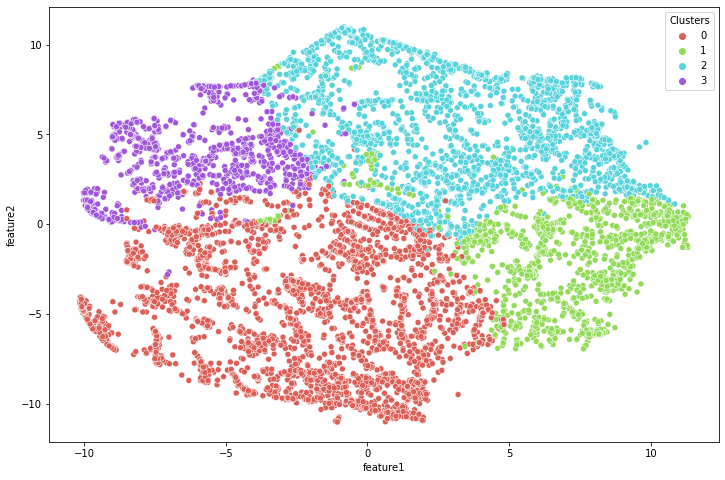

In [92]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## DBSCAN + PCA

In [107]:
clustering_DB_1 = DBSCAN(eps=0.4, min_samples=12).fit(df_pca)
label_DBScan_1 = clustering_DB_1.labels_

In [108]:
pd.DataFrame(label_DBScan_1).value_counts()

 0    8887
-1      63
dtype: int64

when we use PCA with DBSCAN with same epsilon can notice that noise points decrease

## Hierarchical + PCA

In [110]:
clustering_Agg = AgglomerativeClustering(n_clusters=3).fit(df_pca)
hier_labels = clustering_Agg.labels_
hier_labels


array([0, 0, 2, ..., 1, 0, 1], dtype=int64)

In [111]:

score = silhouette_score(df_pca,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.263


In [112]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(hier_labels)
df_embed_kmeans

feature1  feature2  Clusters
0    -3.092095 -0.845065         0
1    -4.791693 -5.782605         0
2     8.012232 -6.043531         2
3    -6.056050  1.684146         0
4    -2.639165 -3.167396         0
...        ...       ...       ...
8945 -1.466049  6.516825         1
8946  0.000710  4.908300         1
8947 -0.461162  5.123566         1
8948 -6.852159 -0.210678         0
8949 -3.779063  0.175931         1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

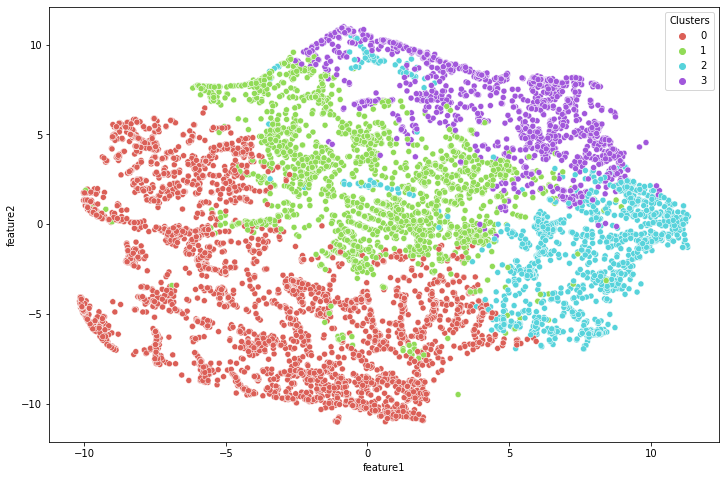

In [113]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 3)
)

# Anomaly Detection + PCA

## 1. <a>Isolated Random Forest + PCA </a>


In [114]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_pca)

anom_pred = clf.predict(df_pca)
anom_pred

array([ 1,  1,  1, ..., -1, -1, -1])

In [115]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [116]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1  feature2  Labels
0    -3.092095 -0.845065       1
1    -4.791693 -5.782605       1
2     8.012232 -6.043531       1
3    -6.056050  1.684146       1
4    -2.639165 -3.167396       1
...        ...       ...     ...
8945 -1.466049  6.516825      -1
8946  0.000710  4.908300      -1
8947 -0.461162  5.123566      -1
8948 -6.852159 -0.210678      -1
8949 -3.779063  0.175931      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

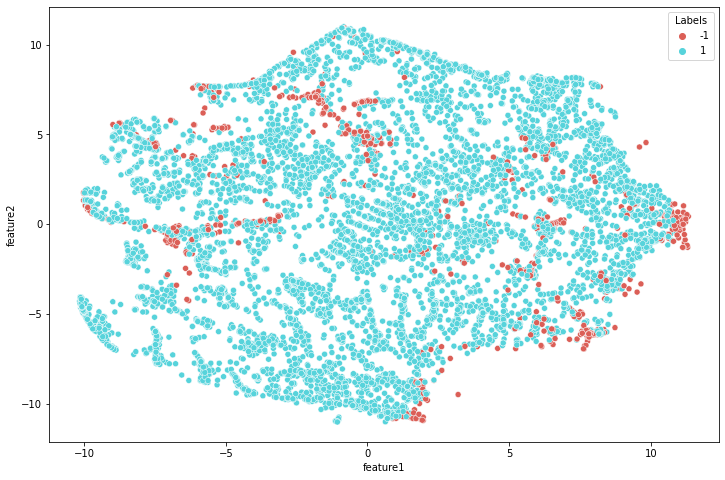

In [117]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM + PCA</a>


In [118]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_pca)

In [119]:
scores = gm.score_samples(df_pca)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [120]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1  feature2  Labels
0    -3.092095 -0.845065       1
1    -4.791693 -5.782605       1
2     8.012232 -6.043531       1
3    -6.056050  1.684146       1
4    -2.639165 -3.167396       1
...        ...       ...     ...
8945 -1.466049  6.516825      -1
8946  0.000710  4.908300      -1
8947 -0.461162  5.123566      -1
8948 -6.852159 -0.210678      -1
8949 -3.779063  0.175931       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

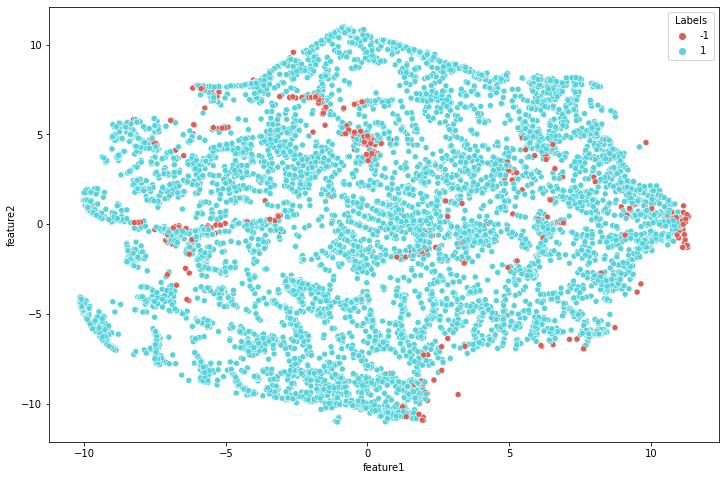

In [121]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN + PCA</a>


In [122]:
DB = DBSCAN(eps=0.5, min_samples=17).fit(df_pca)
label_DBScan = DB.labels_

In [123]:
pd.DataFrame(label_DBScan).value_counts()

 0    8935
-1      15
dtype: int64

Can notice that using DBSAN with same epsilon with PCA not give us noise points , rather than before give us 75 point noise.

##### TSNE

In [124]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(label_DBScan)
df_embed_Iso

feature1  feature2  Labels
0    -3.092095 -0.845065       0
1    -4.791693 -5.782605       0
2     8.012232 -6.043531       0
3    -6.056050  1.684146       0
4    -2.639165 -3.167396       0
...        ...       ...     ...
8945 -1.466049  6.516825       0
8946  0.000710  4.908300       0
8947 -0.461162  5.123566       0
8948 -6.852159 -0.210678       0
8949 -3.779063  0.175931       0

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

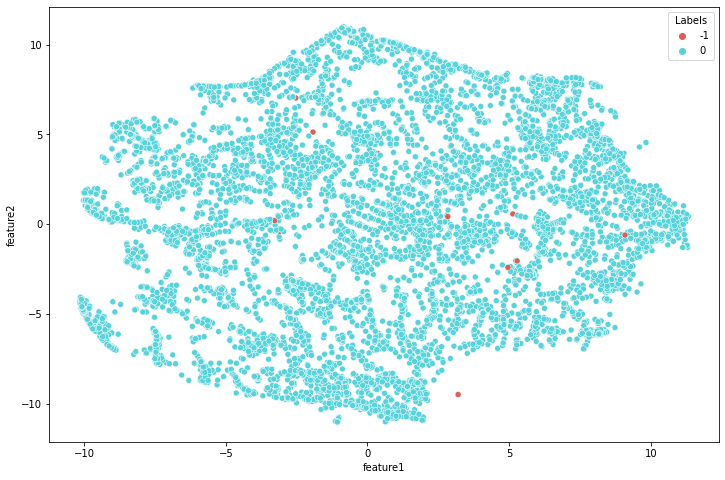

In [126]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


# Clustering + KernalPCA

## KMean + KernalPCA

In [127]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_kpca)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 2690
sum of elements that contain in cluster 1 : 3619
sum of elements that contain in cluster 2 : 1215
sum of elements that contain in cluster 3 : 1426
--------------------------------------------------


In [128]:
score = silhouette_score(df_kpca,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.342


In [129]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1  feature2  Clusters
0    -3.092095 -0.845065         1
1    -4.791693 -5.782605         1
2     8.012232 -6.043531         3
3    -6.056050  1.684146         1
4    -2.639165 -3.167396         1
...        ...       ...       ...
8945 -1.466049  6.516825         0
8946  0.000710  4.908300         0
8947 -0.461162  5.123566         0
8948 -6.852159 -0.210678         1
8949 -3.779063  0.175931         3

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

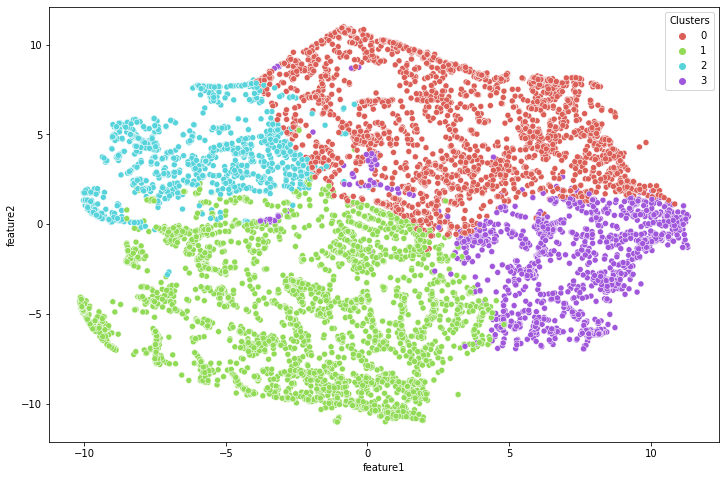

In [130]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## Hierarchical + KernalPCA

In [131]:
clustering_Agg = AgglomerativeClustering(n_clusters=3).fit(df_kpca)
hier_labels = clustering_Agg.labels_
hier_labels


array([0, 0, 2, ..., 3, 0, 3], dtype=int64)

In [132]:

score = silhouette_score(df_kpca,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.253


In [133]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(hier_labels)
df_embed_kmeans

feature1  feature2  Clusters
0    -3.092095 -0.845065         0
1    -4.791693 -5.782605         0
2     8.012232 -6.043531         2
3    -6.056050  1.684146         0
4    -2.639165 -3.167396         0
...        ...       ...       ...
8945 -1.466049  6.516825         3
8946  0.000710  4.908300         3
8947 -0.461162  5.123566         3
8948 -6.852159 -0.210678         0
8949 -3.779063  0.175931         3

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

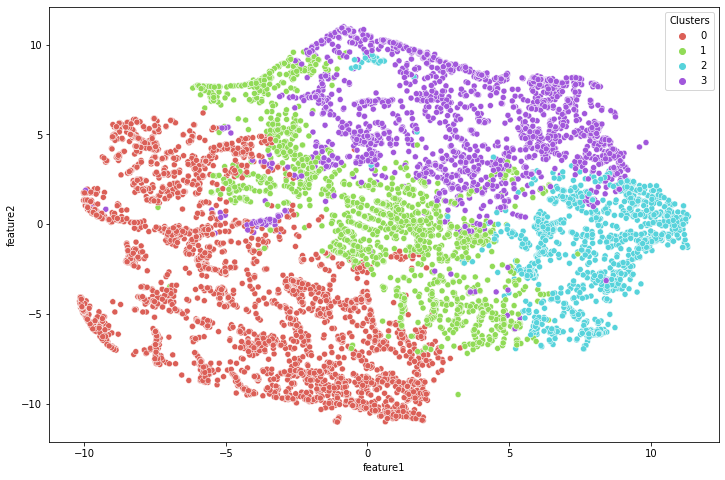

In [134]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 3)
)

## DBSCAN + KernalPCA

In [135]:
clustering_DB_1 = DBSCAN(eps=0.4, min_samples=12).fit(df_kpca)
label_DBScan_1 = clustering_DB_1.labels_

In [136]:
pd.DataFrame(label_DBScan_1).value_counts()

0    8950
dtype: int64

Same epsilon not give noise points at this case rather than result without using any dimensionality reduction or using PCA.

# Anomaly Detection + KernalPCA

## 1. <a>Isolated Random Forest + KernalPCA</a>


In [137]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_kpca)

anom_pred = clf.predict(df_kpca)
anom_pred

array([ 1,  1,  1, ..., -1, -1, -1])

In [138]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [139]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1  feature2  Labels
0    -3.092095 -0.845065       1
1    -4.791693 -5.782605       1
2     8.012232 -6.043531       1
3    -6.056050  1.684146       1
4    -2.639165 -3.167396       1
...        ...       ...     ...
8945 -1.466049  6.516825      -1
8946  0.000710  4.908300      -1
8947 -0.461162  5.123566      -1
8948 -6.852159 -0.210678      -1
8949 -3.779063  0.175931      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

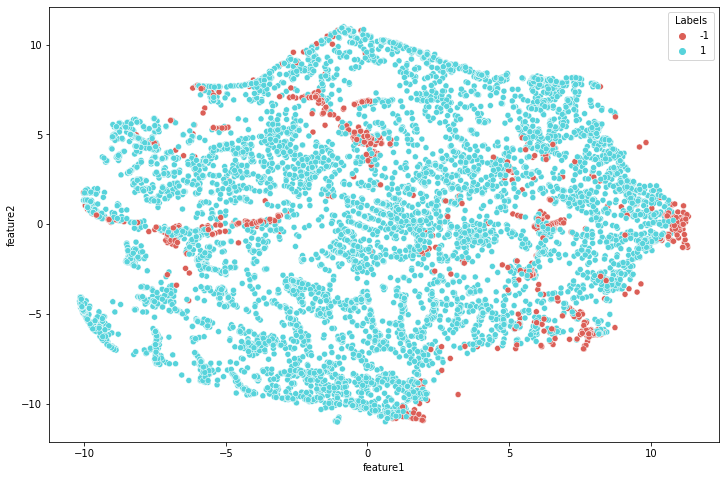

In [140]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM + KernalPCA</a>


In [142]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_kpca)

In [143]:
scores = gm.score_samples(df_kpca)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [144]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1  feature2  Labels
0    -3.092095 -0.845065       1
1    -4.791693 -5.782605       1
2     8.012232 -6.043531       1
3    -6.056050  1.684146       1
4    -2.639165 -3.167396       1
...        ...       ...     ...
8945 -1.466049  6.516825      -1
8946  0.000710  4.908300      -1
8947 -0.461162  5.123566      -1
8948 -6.852159 -0.210678      -1
8949 -3.779063  0.175931      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

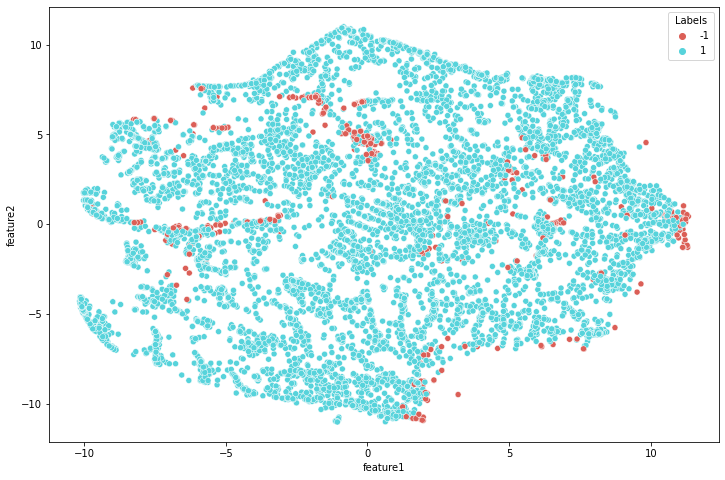

In [145]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN</a>


In [147]:
DB = DBSCAN(eps=0.5, min_samples=17).fit(df_kpca)
label_DBScan = DB.labels_

In [148]:
pd.DataFrame(label_DBScan).value_counts()

0    8950
dtype: int64

using Kernal-PCA at DBSCAN with same parameters not give any noise points 

#### NOTES
- KMean Clustering best algorithm result for clustering and DBSCAN is the worest one.

- Result (Score) when using dimensionality Reduction (PCA) became better, but (KernalPCA) not give better result

- I use different approaches to evaluate the perforamance of clustering models :
    <p> • Silhoutte Score </p>
    <p> • Davies Bouldin Score </p>
    <p> • Calinski Harabasz Score </p>
    <p> • TSNE Visualization </p>